
<h3>Name:- Babin Joshi<br/>
    Roll No:- 19
</h3>

<center><h1>Getting Started With Python Machine Learning</h1></center>

<h1>Learning NumPy</h1>

In [1]:
import numpy

In [2]:
numpy.version.full_version

'1.19.2'

As we do not want to pollute our namespace, <b>we should not use the following code:</b>

In [3]:
from numpy import *

Because, for instance, numpy.array will potentially shadow the array package that is included in standard Python. Instead, we will use the following convenient shortcut:

In [4]:
import numpy as np

In [5]:
a = np.array([0,1,2,3,4,5])

In [6]:
a

array([0, 1, 2, 3, 4, 5])

In [7]:
a.ndim

1

In [8]:
a.shape

(6,)

In [9]:
b = a.reshape((3,2))

In [10]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [11]:
b.ndim

2

In [12]:
b.shape

(3, 2)

In [13]:
b[1][0] = 77

In [14]:
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [15]:
a

array([ 0,  1, 77,  3,  4,  5])

In [16]:
c = a.reshape((3,2)).copy()

In [17]:
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [18]:
c[0][0] = -99

In [19]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [20]:
a

array([ 0,  1, 77,  3,  4,  5])

In [21]:
d = np.array([1,2,3,4,5])

In [22]:
d * 2

array([ 2,  4,  6,  8, 10])

In [23]:
d ** 2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [24]:
[1,2,3,4,5] * 2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

<h1>Indexing</h1>

In [25]:
a

array([ 0,  1, 77,  3,  4,  5])

In [26]:
a[np.array([2,3,4])]

array([77,  3,  4])

In [27]:
a > 4

array([False, False,  True, False, False,  True])

In [28]:
a[a>4]

array([77,  5])

By performing the following command, this can be used to trim outliers:

In [29]:
a[a>4] = 4

In [30]:
a

array([0, 1, 4, 3, 4, 4])

As this is a frequent use case, there is a special <b>clip</b> function used for clipping the values at bond ends of an interval

In [31]:
b = np.array([ 0,  1, 77,  3,  4,  5])

In [32]:
b

array([ 0,  1, 77,  3,  4,  5])

In [33]:
b.clip(0,4)

array([0, 1, 4, 3, 4, 4])

In [34]:
b

array([ 0,  1, 77,  3,  4,  5])

<h1>Handling nonexisting values</h1>

Numpy Indexing capabilites comes in handy when preprocessing data that we have just read in from a text file. Most likely, it will contain invalid values that will be marked using <b>numpy.NAN</b>:

In [35]:
c = np.array([1,2, np.NAN, 3, 4])

In [36]:
c

array([ 1.,  2., nan,  3.,  4.])

In [37]:
np.isnan(c)

array([False, False,  True, False, False])

In [38]:
c[~(np.isnan(c))]

array([1., 2., 3., 4.])

In [39]:
np.mean(c[~(np.isnan(c))])

2.5

<h1>Comparing the runtime</h1>

In [40]:
import timeit

In [41]:
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number = 10000)

In [42]:
naive_np_sec = timeit.timeit(
                'sum(na*na)',
                setup="import numpy as np; na = np.arange(1000)",
                number=10000
)

In [43]:
good_np_sec = timeit.timeit(
                'na.dot(na)',
                setup="import numpy as np; na=np.arange(1000)",
                number=10000
)

In [44]:
print(f"Normal Python: {normal_py_sec} sec")
print(f"Naive NumPy: {naive_np_sec} sec")
print(f"Good NumPy: {good_np_sec}")

Normal Python: 1.618818400000002 sec
Naive NumPy: 2.3019374 sec
Good NumPy: 0.028765499999998667


<b>Note: </b> We make two interesting observations. Firstly, by just using NumPy as data storage (Naive NumPy) takes 3.5 times longer, which is surprising since we believe it must be much faster as it is written as a C extension. One reason for this is that the access of individual elements from Python itself is rather costly. Only when we are able to apply algorithms inside the optimized extension code is when we get speed improvements. The other observation is quite a tremendous one: using the dot()function of NumPy, which does exactly the same, allows us to be more than 25 times faster.

However, using NumPy arrays has its drawbacks as we no longer have the incredible flexibility of Python lists, which can hold basically anything. NumPy arrays have only one data type.

In [45]:
a = np.array([1,2,3])

In [46]:
a.dtype

dtype('int32')

<b>Note: If we try to use elements of different types, such as the ones shown in the following code, NumPy will do its best to coerce them to be the most reasonable common data type such as:</b>  

In [47]:
np.array([1, 'stringy'])

array(['1', 'stringy'], dtype='<U11')

<h1>Learning SciPy</h1>

In [48]:
import scipy, numpy

In [49]:
scipy.version.full_version

'1.6.1'

In [50]:
scipy.dot is numpy.dot

False

The diverse algorithms are grouped into the following toolboxes:

![alt text](scipy1.png)

![alt text](scipy2.png)

<h1>Out first(tiny) application of machine learning</h1>

In [51]:
 import scipy as sp

In [52]:
data = sp.genfromtxt("web_traffic.tsv", delimiter='\t')

<ipython-input-52-0bfac29b600f>:1: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  data = sp.genfromtxt("web_traffic.tsv", delimiter='\t')


In [53]:
data

array([[1.000e+00, 2.272e+03],
       [2.000e+00,       nan],
       [3.000e+00, 1.386e+03],
       ...,
       [7.410e+02, 5.392e+03],
       [7.420e+02, 5.906e+03],
       [7.430e+02, 4.881e+03]])

In [54]:
len(data)

743

In [55]:
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [56]:
data.shape

(743, 2)

<h1>Preprocessing and cleaning the data</h1>

In [57]:
x = data[:, 0]
y = data[:, 1]

In [58]:
x[:5]

array([1., 2., 3., 4., 5.])

In [59]:
y[:5]

array([2272.,   nan, 1386., 1365., 1488.])

In [60]:
sp.sum(sp.isnan(y))

<ipython-input-60-d6e39c765d76>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  sp.sum(sp.isnan(y))
<ipython-input-60-d6e39c765d76>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(sp.isnan(y))


8

In [61]:
len(y[~(sp.isnan(y))])

<ipython-input-61-6f5cab7b2b04>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  len(y[~(sp.isnan(y))])


735

In [62]:
x = x[~(sp.isnan(y))]

<ipython-input-62-34a3830f2779>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  x = x[~(sp.isnan(y))]


In [63]:
y = y[~(sp.isnan(y))]

<ipython-input-63-a3a7b25033d7>:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  y = y[~(sp.isnan(y))]


In [64]:
print(f"Length of x: {len(x)} and Length of y: {len(y)}")

Length of x: 735 and Length of y: 735


In [65]:
import matplotlib.pyplot as plt

In [66]:
%matplotlib inline

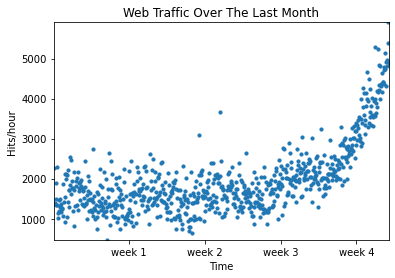

In [67]:
plt.scatter(x, y, s= 10 )
plt.title("Web Traffic Over The Last Month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)

<h1>Choosing the right model and learning algorithm</h1>

<b>Note: </b>When we talk about models, we can think of them as simplified theoretical approximations of complex reality. As such there is always some inferiority involved, also called the approximation error. This error will guide us in choosing the right model among the myriad of choices we have. And this error will be calculated as the squared distance of the model's prediction to the real data;



In [68]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

The trained model is assumed to take a vector and return the results again as a vector of the same size so that we can use it to calculate the difference to y.

In [69]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

<ipython-input-69-176abcef6c22>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)


In [70]:
print(f"Model Parameters: {fp1}")

Model Parameters: [  2.59619213 989.02487106]


In [71]:
print(f"Residuals: {residuals}")

Residuals: [3.17389767e+08]


This means the best straight line fit is the following function:
f(x) = 2.59619213 * x + 989.02487106

We then use <b>poly1d()</b> to create a model function from the model parameters:

In [72]:
f1 = sp.poly1d(fp1)

In [73]:
print(f"{error(f1, x, y)}")

317389767.339778


<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


We can now use <b>f1()</b> to plot our first trained model. In addition to the preceding plotting instruction, we simply add the following code:

<ipython-input-107-d7537ec10a5a>:9: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  fx = sp.linspace(0, x[-1], 1000)


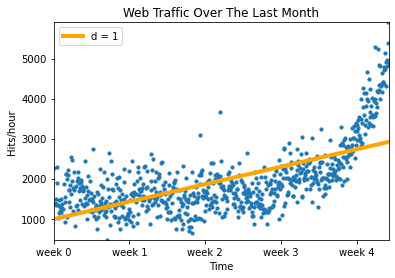

In [107]:
plt.scatter(x, y, s= 10 )
plt.title("Web Traffic Over The Last Month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth = 4, c = 'orange')
plt.legend(["d = %i" % f1.order], loc='upper left')

The absolute value of the error is seldom of use in isolation. However, when comparing two competing models, we can use their errors to judge which one of them is better.

<h1>Towards some advanced stuff</h1>

<b>A polynomial of order 2</b>

In [75]:
f2p = sp.polyfit(x, y, 2)

<ipython-input-75-5d6578798a8c>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  f2p = sp.polyfit(x, y, 2)


In [76]:
print(f"{f2p}")

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [77]:
f2 = sp.poly1d(f2p)

In [78]:
print(f"{error(f2, x, y)}")

179983507.8781792


<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


The error is 179,983,507.878, which is almost half the error of the straight line model. This is good but unfortunately this comes with a price: We now have a more complex function, meaning that we have one parameter more to tune inside polyfit().
The fitted polynomial is as follows:<br/>
<b>f(x) = 0.0105322215 * x**2 - 5.26545650 * x + 1974.76082</b>

<ipython-input-112-ba954dcbf589>:9: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  fx = sp.linspace(0, x[-1], 1000)


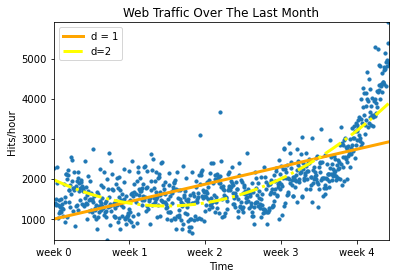

In [112]:
plt.scatter(x, y, s= 10 )
plt.title("Web Traffic Over The Last Month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth = 3, label = 'd = 1',  color='orange')
plt.plot(fx, f2(fx), "-.", label='d=2', color='yellow', linewidth = 3)
plt.legend(loc='upper left')
# plt.legend(["d = %i" % f1.order], loc='upper left')



<b>A polynomial of order 3</b>

In [80]:
f3p = sp.polyfit(x, y, 3)
print(f"{f3p}")
f3 = sp.poly1d(f3p)
print(f"Error: {error(f3, x, y)}")

[ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
Error: 139350144.03172523


<ipython-input-80-ad85bafed78f>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  f3p = sp.polyfit(x, y, 3)
<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


<b>A polynomial of order 10</b>

In [81]:
f10p = sp.polyfit(x, y, 10)
print(f"{f10p}")
f10 = sp.poly1d(f10p)
print(f"Error: {error(f10, x, y)}")

[-3.73981969e-22  1.36473757e-18 -2.14294407e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604589e-05  1.19167041e-02
 -9.41618607e-01  3.33703840e+01  1.26421204e+03]
Error: 121942326.36347426


<ipython-input-81-3eef983fc3c3>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  f10p = sp.polyfit(x, y, 10)
<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


<b>A polynomial of order 100</b>

In [113]:
f53p = sp.polyfit(x, y, 100)
print(f"{f53p}")
f53 = sp.poly1d(f53p)
print(f"Error: {error(f53, x, y)}")

[ 0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000 -6.72746216e-140
  1.19704212e-136 -4.65700648e-135 -4.66493879e-131 -2.54252780e-128
  2.25945002e-126  1.39014362e-122  1.16112360e-119  4.32298945e-117
 -1.50804819e-114 -3.76693575e-111

<ipython-input-113-f7b3ffb2dcbe>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  f53p = sp.polyfit(x, y, 100)
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-113-f7b3ffb2dcbe>:1: RankWarning: Polyfit may be poorly conditioned
  f53p = sp.polyfit(x, y, 100)
<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


In [117]:
for idx, degree in enumerate([1, 2, 3, 10, 100]):
    func = scipy.poly1d(scipy.polyfit(x, y, degree))
    print(f"error for degree {func.order} is : {error(func, x, y)}")

error for degree 1 is : 317389767.339778
error for degree 2 is : 179983507.8781792
error for degree 3 is : 139350144.03172523
error for degree 10 is : 121942326.36347426
error for degree 53 is : 109452384.92468244


<ipython-input-117-f7cac5cd44bd>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  func = scipy.poly1d(scipy.polyfit(x, y, degree))
<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-117-f7cac5cd44bd>:2: RankWarning: Polyfit may be poorly conditioned
  func = scipy.poly1d(scipy.polyfit(x, y, degree))


<ipython-input-116-864908fd9b4b>:9: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  fx = sp.linspace(0, x[-1], 1000)


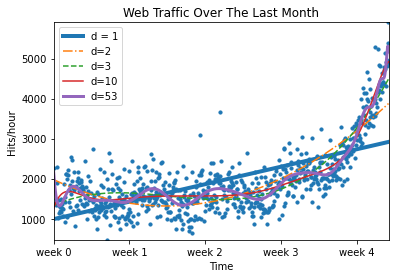

In [116]:
plt.scatter(x, y, s= 10 )
plt.title("Web Traffic Over The Last Month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth = 4, label = 'd = 1')
plt.plot(fx, f2(fx), "-.", label='d=2')
plt.plot(fx, f3(fx), "--", label='d=3')
plt.plot(fx, f10(fx), label='d=10')
plt.plot(fx, f53(fx), linewidth=3, label='d=53')
plt.legend(loc='upper left')
# plt.legend(["d = %i" % f1.order], loc='upper left')


<h1>Stepping back to go forward - another look at our data</h1>

In [242]:
inflection = 3.5 * 7 * 24

In [243]:
inflection

588.0

In [244]:
xa = x[:int(inflection)]

In [245]:
ya = y[:int(inflection)]

In [246]:
xb = x[int(inflection):]

In [247]:
yb = y[int(inflection):]

In [248]:
fa = sp.poly1d(sp.polyfit(xa, ya, 1))

<ipython-input-248-72eedc27a705>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fa = sp.poly1d(sp.polyfit(xa, ya, 1))


In [249]:
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

<ipython-input-249-5e6fec40c184>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fb = sp.poly1d(sp.polyfit(xb, yb, 1))


In [250]:
fa_error = error(fa,xa,ya)

<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


In [251]:
fb_error = error(fb,xb,yb)

<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


In [252]:
print(f"Error inflection: {fa_error +  fb_error}")

Error inflection: 132950348.1976164


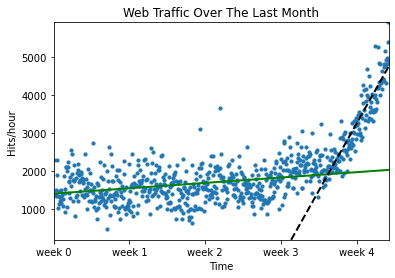

In [253]:
# fig2, ax2 = plt.subplots(figsize=(10,8))
plt.scatter(x, y, s= 10)
plt.title("Web Traffic Over The Last Month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fxa = np.linspace(0,x[-1],1000)
fxb = np.linspace(xa[-70], xb[-1],1000)
plt.plot(fxa, fa(fxa), linewidth = 2,c='green')
plt.plot(fxb, fb(fxb), linewidth = 2, c='black', linestyle='--')


In [254]:

# plt.scatter(x, y, s= 10 )
# plt.title("Web Traffic Over The Last Month")
# plt.xlabel("Time")
# plt.ylabel("Hits/hour")
# plt.xticks([w*7*24 for w in range(10)],
#           ['week %i' % w for w in range(10)])
# plt.autoscale(tight=True)

# # fx = sp.linspace(0, x[-1], 1000)
# # plt.plot(fx, f1(fx), linewidth = 4, label = 'd = 1')
# plt.plot(xa, fa(xa), linewidth = 4, label='d=1', color='green')
# plt.plot(xb, fb(xb),':', linewidth = 4, label='d=1', color='black')
# plt.legend(loc='best')

In [255]:
fnp = []
for idx, degree in enumerate([3, 10, 100]):
    fnp.append(scipy.poly1d(scipy.polyfit(x, y, degree)))
    print(f"error for degree {fnp[idx].order} is : {error(fnp[idx], x, y)}")

error for degree 3 is : 139350144.03172523
error for degree 10 is : 121942326.36347426
error for degree 53 is : 109452384.92468244


<ipython-input-255-d1b669ed05d7>:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fnp.append(scipy.poly1d(scipy.polyfit(x, y, degree)))
<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-255-d1b669ed05d7>:3: RankWarning: Polyfit may be poorly conditioned
  fnp.append(scipy.poly1d(scipy.polyfit(x, y, degree)))


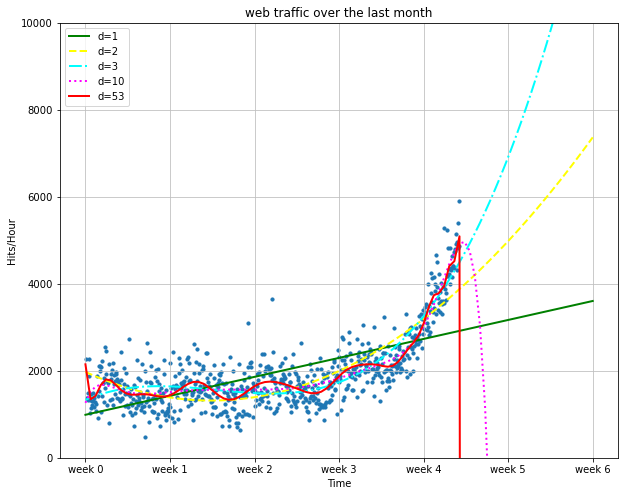

In [256]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, s=10)

plt.title("web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/Hour")

labels3 = []

# generate X-values for plotting up to 6 weeks
fx = np.linspace(0, 6 * 7 * 24, 100) 

plt.plot(fx, f1(fx), linewidth=2, c="green")
labels3.append("d=%i" % f1.order)

plt.plot(fx, f2(fx), linestyle="--", linewidth=2, c="yellow")
labels3.append("d=%i" % f2.order)

colors = ["cyan", "magenta", "red"]
l_style = ["-.", "dotted", '-']

for fn, c, ls in zip(fnp, colors, l_style):
    labels3.append("d=%i" % fn.order)
    plt.plot(fx, fn(fx), linestyle=ls, linewidth=2, c=c)

plt.legend(labels3, loc="upper left")

plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])

plt.ylim(ymin=0, ymax=10000)

plt.grid(True, linestyle='-', color='0.75')

<b>Fitting the model with the data for the last week only</b>

In [257]:
fnp_b = []
for idx, degree in enumerate([1,2,3,10,100]):
    func = sp.poly1d(sp.polyfit(xb, yb, degree))
    fnp_b.append(func)
    print(f"Error for degree {func.order} is: {error(func, xb, yb)}")

Error for degree 1 is: 22143941.10761824
Error for degree 2 is: 19768846.989176307
Error for degree 3 is: 19766452.361026984
Error for degree 10 is: 18949296.465861466
Error for degree 53 is: 18300767.442670822


<ipython-input-257-fce4c552acf9>:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  func = sp.poly1d(sp.polyfit(xb, yb, degree))
<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)
<ipython-input-257-fce4c552acf9>:3: RankWarning: Polyfit may be poorly conditioned
  func = sp.poly1d(sp.polyfit(xb, yb, degree))
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-257-fce4c552acf9>:3: RankWarning: Polyfit may be poorly conditioned
  func = sp.poly1d(sp.polyfit(xb, yb, degree))


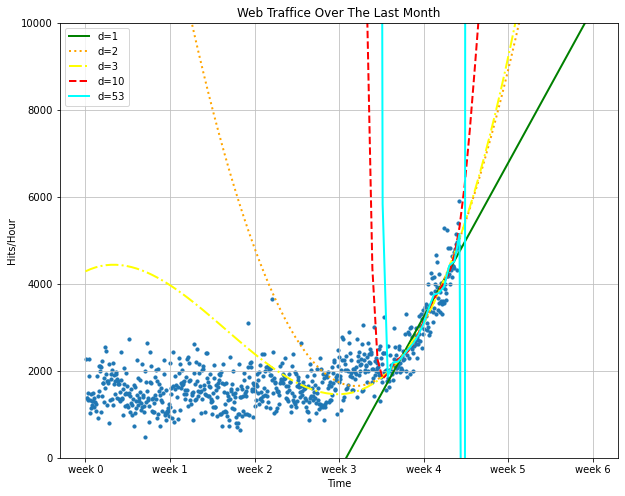

In [258]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,s=10)
plt.title('Web Traffice Over The Last Month')
plt.xlabel("Time")
plt.ylabel("Hits/Hour")

labels4 = []
fx = np.linspace(0,6*7*24,100)
colors = ['green', 'orange', 'yellow', 'red', 'cyan']
l_style=['-', 'dotted', '-.', '--', '-']

for fn, c, ls in zip(fnp_b, colors, l_style):
    labels4.append("d=%i" % fn.order)
    plt.plot(fx, fn(fx), linestyle=ls, linewidth=2, c=c)
    
plt.legend(labels4, loc='best')

plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])

plt.ylim(ymin=0, ymax=10000)

plt.grid(True, linestyle='-', color='0.75')
    


<h1>Testing and Training</h1>

In [259]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

In [260]:
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train],2))

<ipython-input-260-44dac7ff151e>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
<ipython-input-260-44dac7ff151e>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train],2))


In [261]:
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))

<ipython-input-261-979d06bd2992>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
<ipython-input-261-979d06bd2992>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))


In [262]:
print(f"fbt2(x) = {fbt2}")
print(f"fbt2(x)-100,000={fbt2-100000}")

fbt2(x) =          2
0.08281 x - 90.31 x + 2.638e+04
fbt2(x)-100,000=         2
0.08281 x - 90.31 x - 7.362e+04


In [263]:
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt53 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

<ipython-input-263-1ac764ec3a9e>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
<ipython-input-263-1ac764ec3a9e>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
<ipython-input-263-1ac764ec3a9e>:2: RankWarning: Polyfit may be poorly conditioned
  fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
<ipython-input-263-1ac764ec3a9e>:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt53 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Predator\Anaconda3\envs\ML\lib\site-packages\numpy\core\_methods.p

In [264]:
print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt53]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))


Test errors for only the time after inflection point
Error d=1: 7457328.951190
Error d=2: 6798269.117703
Error d=3: 6876309.643459
Error d=10: 6764017.030154
Error d=53: 9458751.197560


<ipython-input-68-f4fc32825ee8>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return sp.sum((f(x)-y)**2)


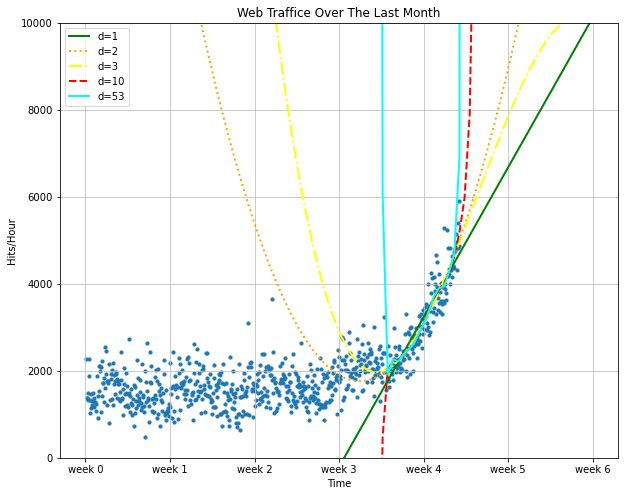

In [265]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,s=10)
plt.title('Web Traffice Over The Last Month')
plt.xlabel("Time")
plt.ylabel("Hits/Hour")

labels4 = []
fx = np.linspace(0,6*7*24,100)
colors = ['green', 'orange', 'yellow', 'red', 'cyan']
l_style=['-', 'dotted', '-.', '--', '-']

for fn, c, ls in zip([fbt1, fbt2, fbt3, fbt10, fbt53], colors, l_style):
    labels4.append("d=%i" % fn.order)
    plt.plot(fx, fn(fx), linestyle=ls, linewidth=2,c=c)
    
    
plt.legend(labels4, loc='upper left')

plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])

plt.ylim(ymin=0, ymax=10000)

plt.grid(True, linestyle='-', color='0.75')

<b>Answering our intial question</b>
<ul>
    <li>finding out when our infrastructure will reach 100,000 requests per hour</li>
</ul>


In [266]:
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print(f"fbt2(x)={fbt2}")

fbt2(x)=         2
0.08281 x - 90.31 x + 2.638e+04


<ipython-input-266-7434542f7872>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))


In [267]:
print(f"fbt2(x)-100,000={fbt2-100000}")

fbt2(x)-100,000=         2
0.08281 x - 90.31 x - 7.362e+04


In [268]:
from scipy.optimize import fsolve

In [269]:
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)

In [270]:
print(f"100,000 hits/hour expected at week {reached_max[0]}")

100,000 hits/hour expected at week 9.728612718712773
